
## Student Performance Prediction

## Objective
The objective of this project is to develop a machine learning model to predict a student's **Grade Point Average (GPA)** based on their demographic, academic, and extracurricular attributes. 
The goal is to assist educators and institutions in identifying students who may need academic support and to improve educational outcomes.

## Problem Statement
Educational institutions often have access to various student-related data such as age, gender, study hours, absences, and participation in extracurricular activities. 
However, identifying the relationship between these factors and student academic performance can be challenging.  
The challenge is to build a regression model that can accurately predict **GPA** using available student performance data.  
By predicting GPA, institutions can proactively provide interventions and guidance.

## Dataset Description
The dataset contains information about 2392 students with the following columns:

| Column Name        | Description |
|--------------------|-------------|
| StudentID          | Unique identifier for each student |
| Age                | Age of the student |
| Gender             | Gender of the student (0 = Female, 1 = Male, etc.) |
| Ethnicity          | Encoded ethnicity category |
| ParentalEducation  | Encoded parental education level |
| StudyTimeWeekly    | Number of hours spent studying per week |
| Absences           | Number of school days missed |
| Tutoring           | Whether the student receives tutoring (0 = No, 1 = Yes) |
| ParentalSupport    | Level of parental support (encoded) |
| Extracurricular    | Participation in extracurricular activities (0 = No, 1 = Yes) |
| Sports             | Participation in sports activities |
| Music              | Participation in music activities |
| Volunteering       | Participation in volunteering activities |
| GPA                | Grade Point Average (Target Variable) |
| GradeClass         | Encoded grade classification |


In [1]:
#importing all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

In [2]:
# Read the dataset
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
df=pd.DataFrame(data)
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


## Descriptive statistics

In [4]:
df.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
df.tail(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [6]:
df.shape

(2392, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [8]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [9]:
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [10]:
df.nunique()

StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

## Checking for null , nan and duplicate values

In [11]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [12]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [13]:
print(df.duplicated().sum())

0


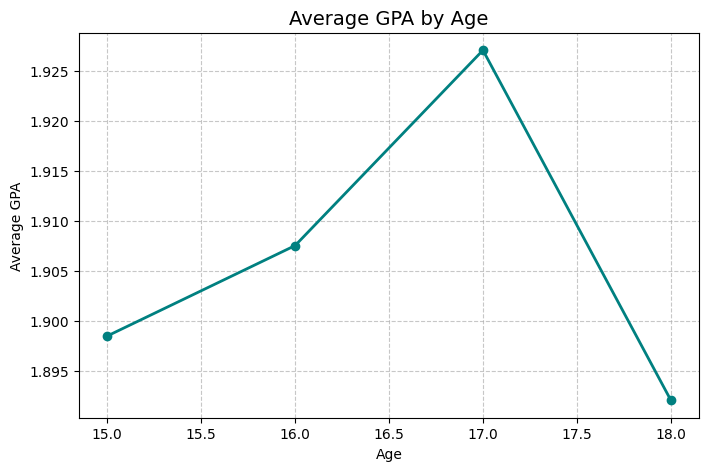

In [14]:
# Aggregate: average GPA per Age
gpa_by_age = df.groupby("Age")["GPA"].mean().reset_index()

# Plot line chart
plt.figure(figsize=(8,5))
plt.plot(gpa_by_age["Age"], gpa_by_age["GPA"], marker='o', linewidth=2, color='teal')
plt.title("Average GPA by Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Average GPA")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

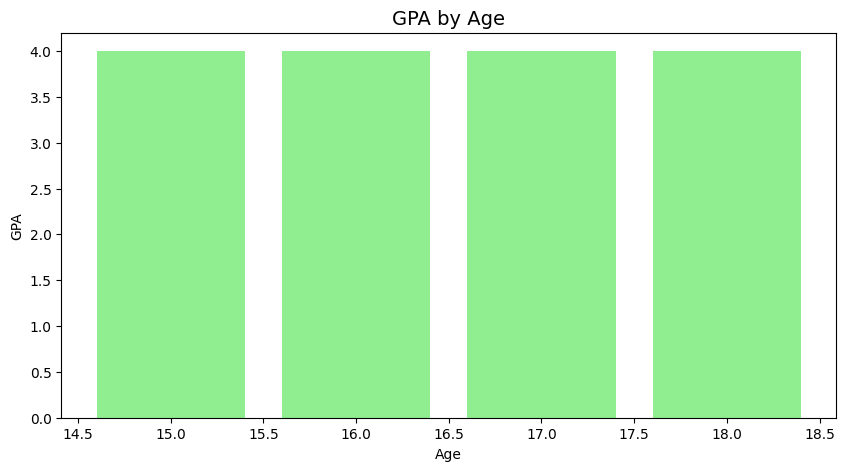

In [15]:
# Simple bar chart
plt.figure(figsize=(10,5))
plt.bar(df["Age"], df["GPA"], color="lightgreen")
plt.title("GPA by Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("GPA")
plt.show()

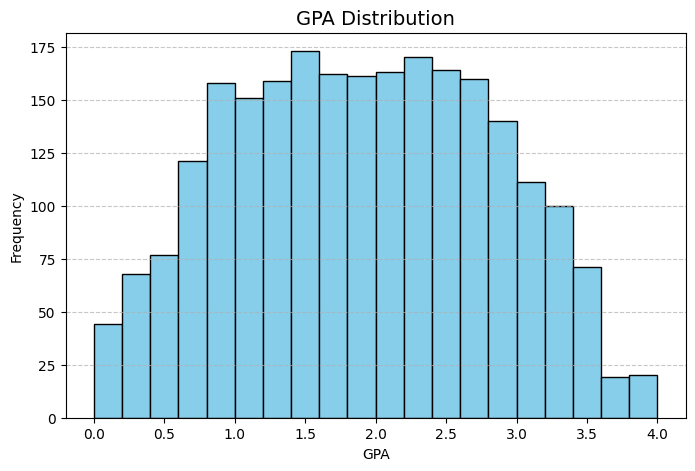

In [16]:
# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df["GPA"], bins=20, color="skyblue", edgecolor="black")
plt.title("GPA Distribution", fontsize=14)
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

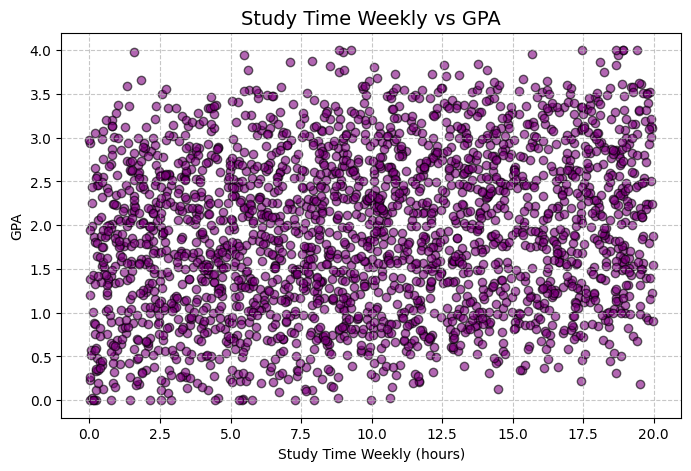

In [17]:
# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df["StudyTimeWeekly"], df["GPA"], color="purple", alpha=0.6, edgecolors="black")
plt.title("Study Time Weekly vs GPA", fontsize=14)
plt.xlabel("Study Time Weekly (hours)")
plt.ylabel("GPA")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

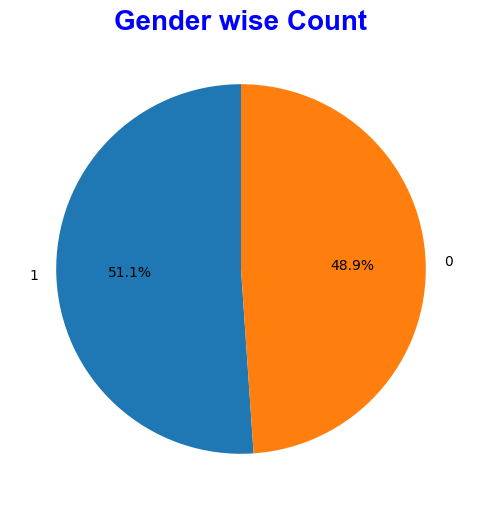

In [18]:
# Gender count
g_cnt = df["Gender"].value_counts()

# Pie chart
plt.figure(figsize=(8,6))
plt.pie(
    g_cnt, 
    labels=g_cnt.index,
    autopct="%1.1f%%", 
    startangle=90
)
plt.title(
    'Gender wise Count', 
    fontdict={'fontsize':20, 'fontname':'arial', 'fontweight':'bold', 'color':'blue'}
)
plt.grid(True)

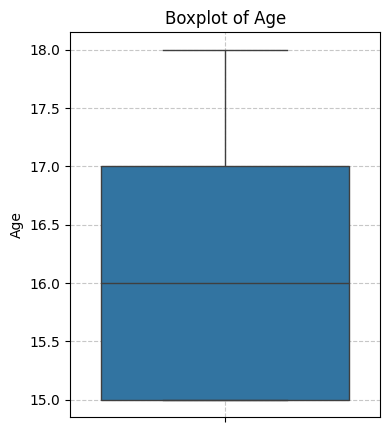

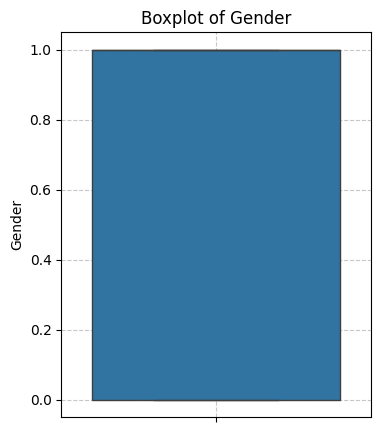

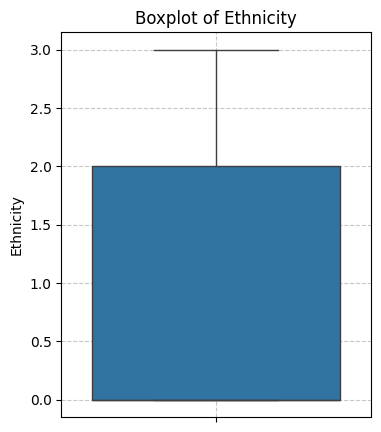

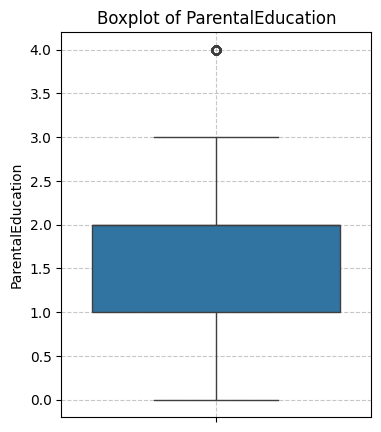

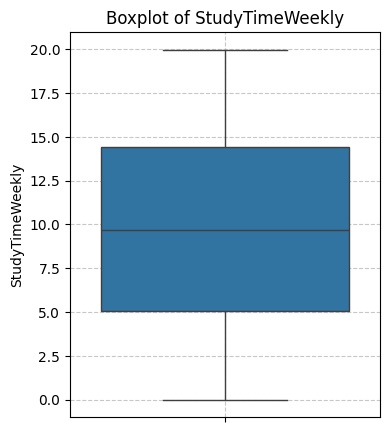

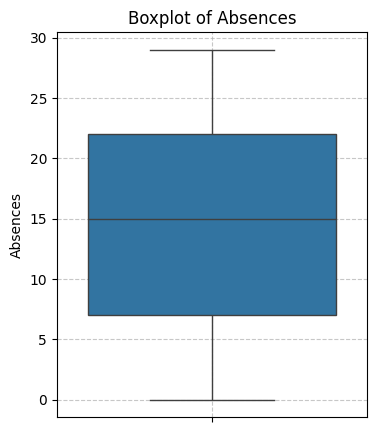

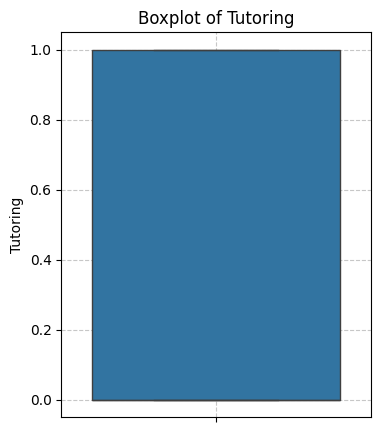

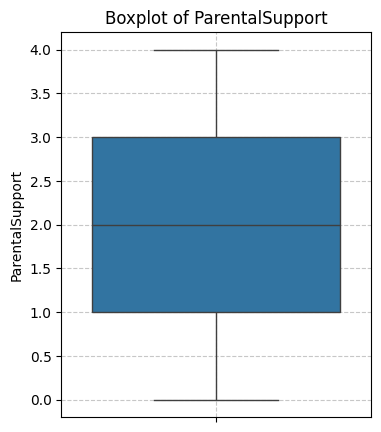

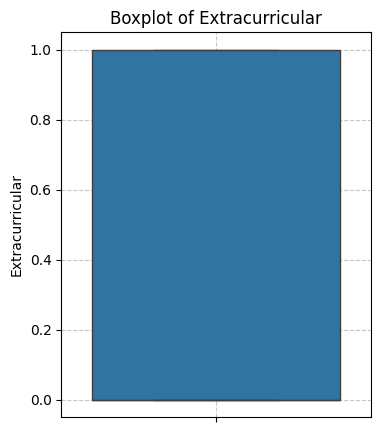

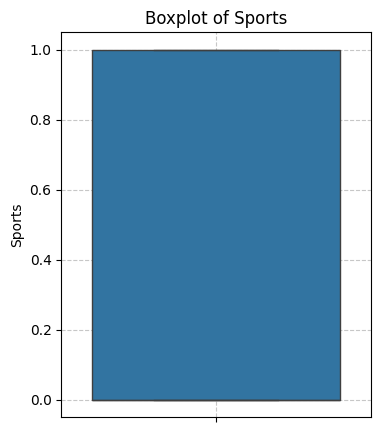

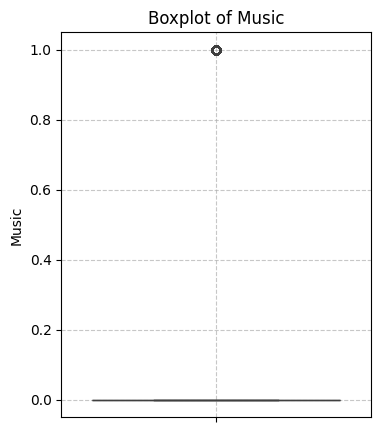

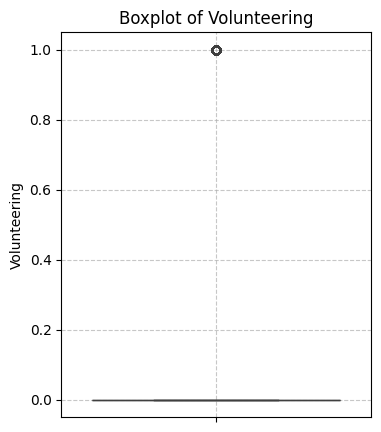

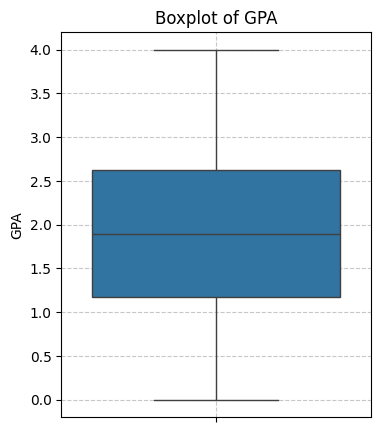

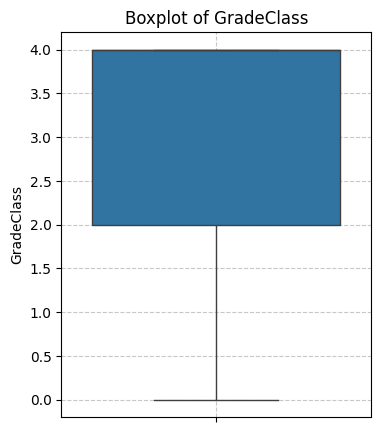

In [19]:
# Loop through numeric columns
for col in df.select_dtypes(include='number').columns.drop("StudentID"):
    plt.figure(figsize=(4,5))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

## Correlation Heatmap

In [20]:
co=df.select_dtypes(include='number').corr()
co

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


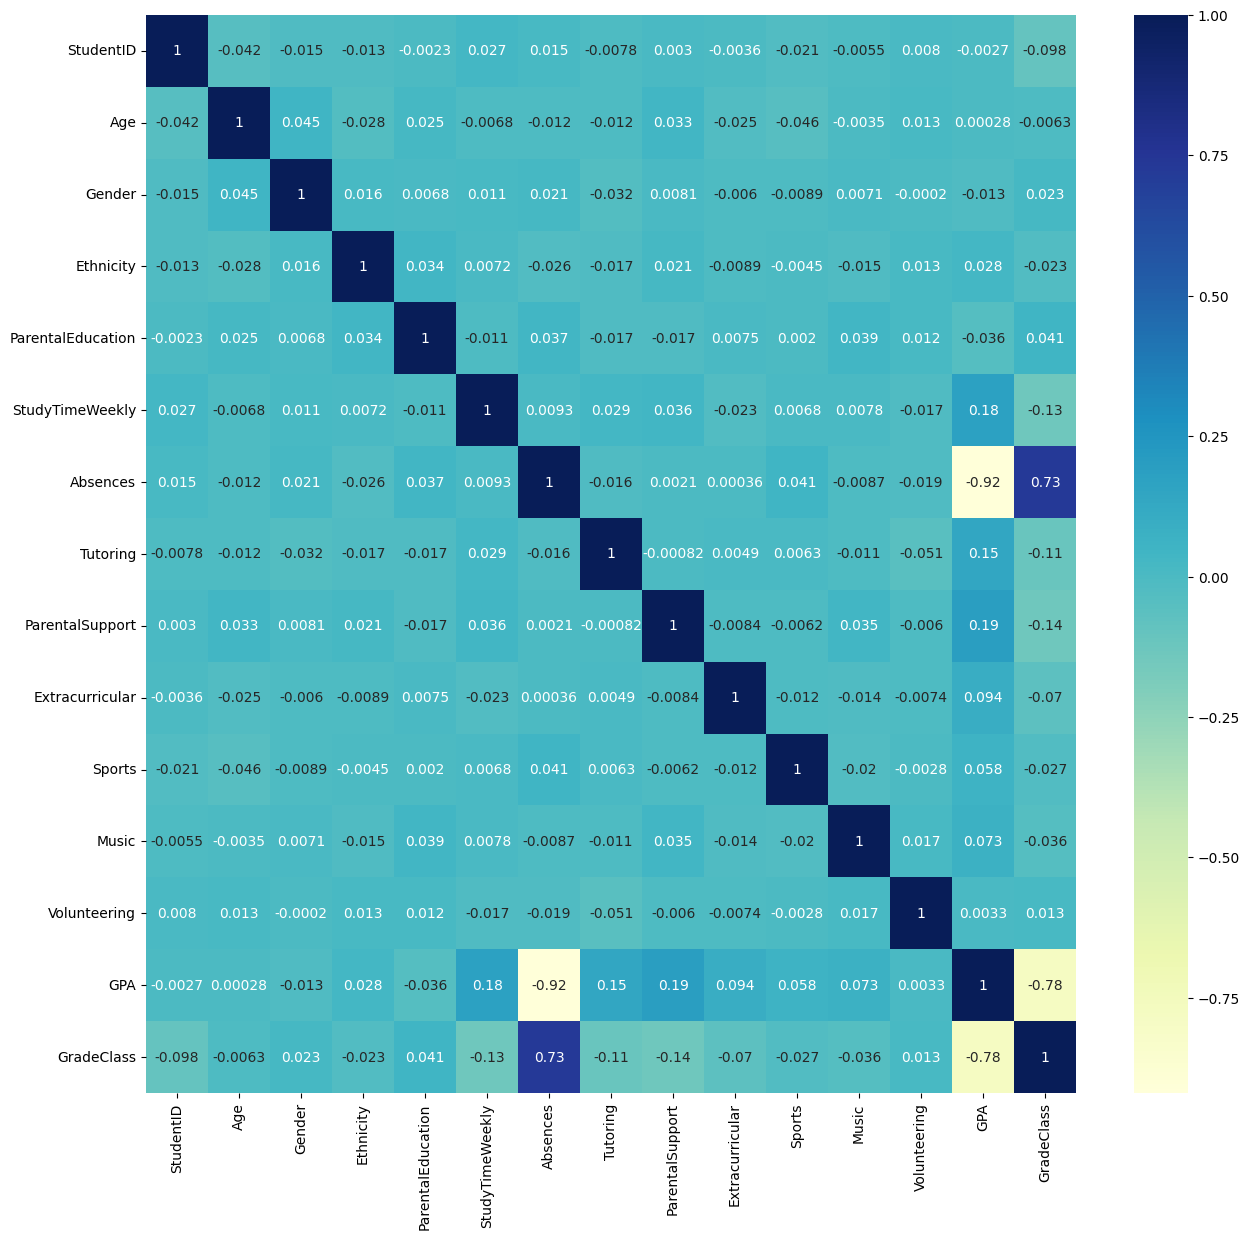

In [21]:
plt.figure(figsize=(15,14))
sns.heatmap(co,annot=True,cmap='YlGnBu')
plt.show()

## STATISTICAL ANALYSIS
Checking for Skewness for all numerical columns

In [22]:
a=df.select_dtypes(include='number').skew()
a

StudentID            0.000000
Age                  0.035793
Gender              -0.043516
Ethnicity            0.759067
ParentalEducation    0.215650
StudyTimeWeekly      0.050068
Absences            -0.026017
Tutoring             0.866045
ParentalSupport     -0.166859
Extracurricular      0.480094
Sports               0.855253
Music                1.525339
Volunteering         1.884851
GPA                  0.014526
GradeClass          -0.900807
dtype: float64

Find mean value for all numerical columns

In [23]:
b=df.select_dtypes(include='number').mean()
b

StudentID            2196.500000
Age                    16.468645
Gender                  0.510870
Ethnicity               0.877508
ParentalEducation       1.746237
StudyTimeWeekly         9.771992
Absences               14.541388
Tutoring                0.301421
ParentalSupport         2.122074
Extracurricular         0.383361
Sports                  0.303512
Music                   0.196906
Volunteering            0.157191
GPA                     1.906186
GradeClass              2.983696
dtype: float64

Finding Kurtosis for all numerical column

In [24]:
k=df.select_dtypes(include='number').kurt()
k

StudentID           -1.200000
Age                 -1.372099
Gender              -1.999779
Ethnicity           -0.767534
ParentalEducation   -0.286197
StudyTimeWeekly     -1.135682
Absences            -1.176225
Tutoring            -1.251014
ParentalSupport     -0.722531
Extracurricular     -1.770992
Sports              -1.269605
Music                0.326931
Volunteering         1.553964
GPA                 -0.863277
GradeClass          -0.416611
dtype: float64

SKEWNESS USING POWER TRANSFORMER FROM SKLEARN

In [25]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [26]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

In [27]:
df_transformed.skew()

StudentID           -0.101785
Age                 -0.008103
Gender              -0.043516
Ethnicity            0.214770
ParentalEducation   -0.043709
StudyTimeWeekly     -0.193878
Absences            -0.248067
Tutoring             0.866045
ParentalSupport     -0.131915
Extracurricular      0.480094
Sports               0.855253
Music                1.525339
Volunteering         1.884851
GPA                 -0.083560
GradeClass          -0.504867
dtype: float64

Plotting Histplot

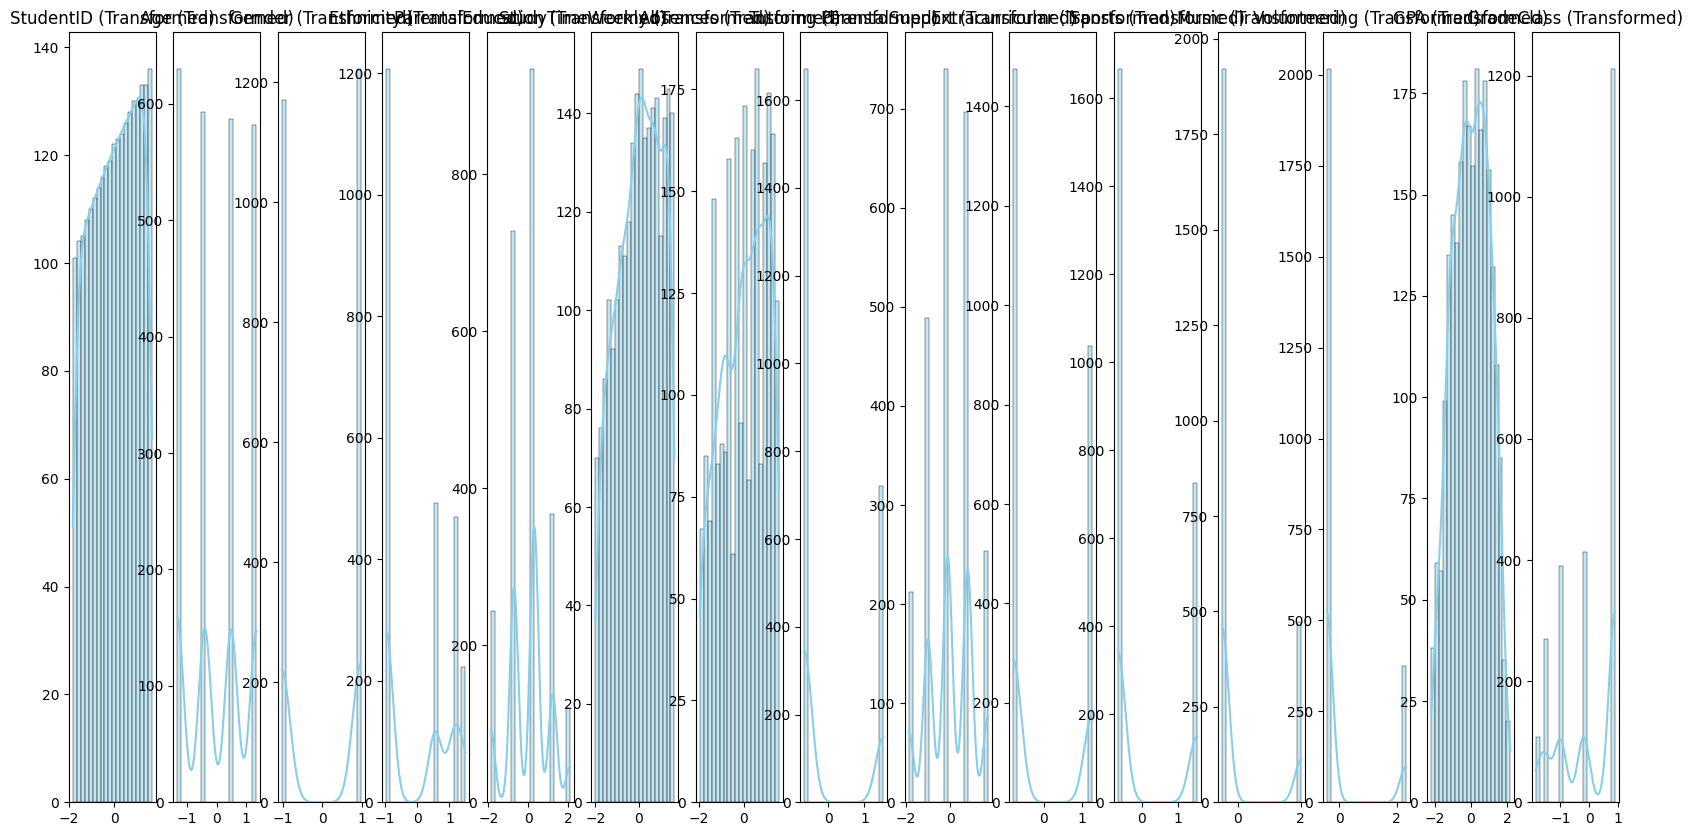

In [28]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(df_transformed[col], kde=True, bins=20, color='skyblue')
    plt.title(f"{col} (Transformed)")
    plt.xlabel('')
    plt.ylabel('')

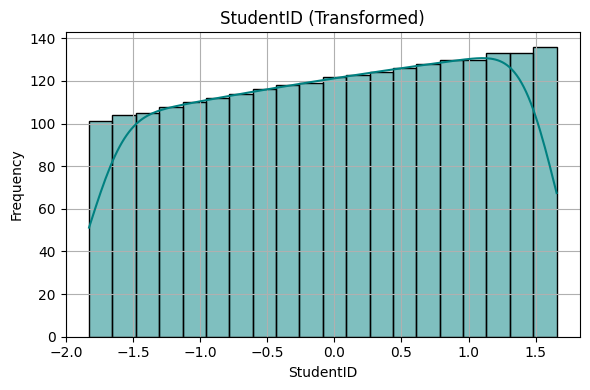

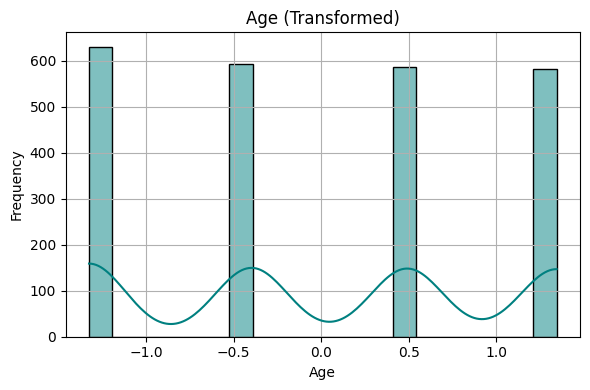

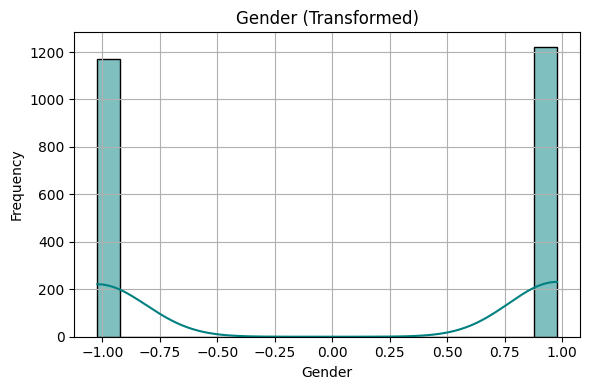

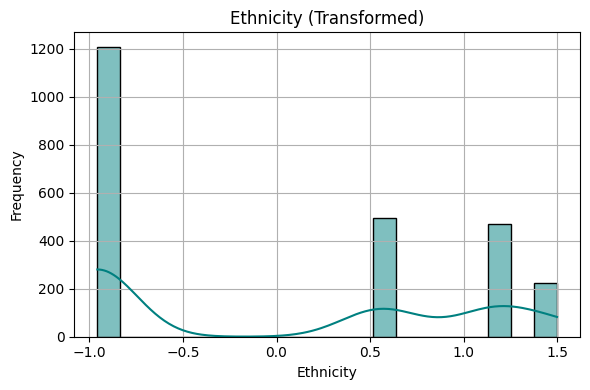

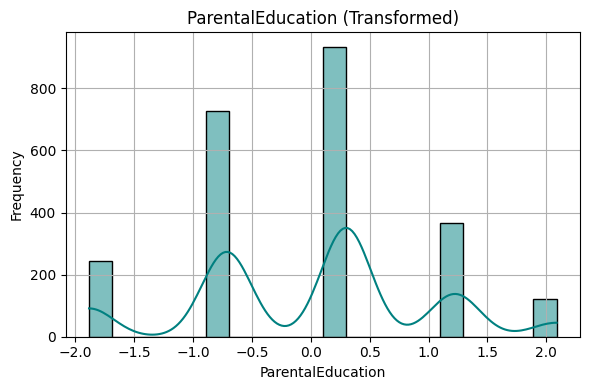

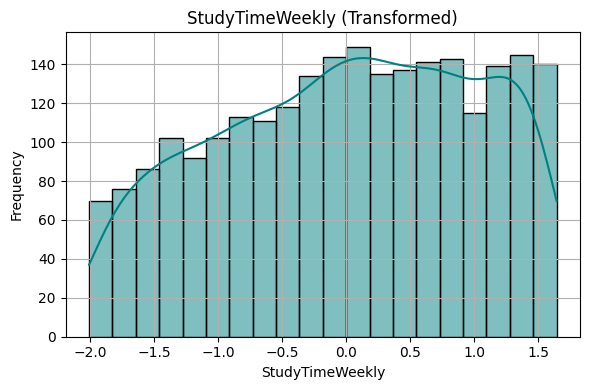

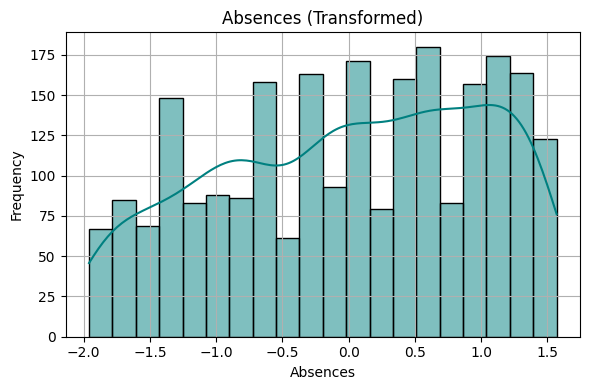

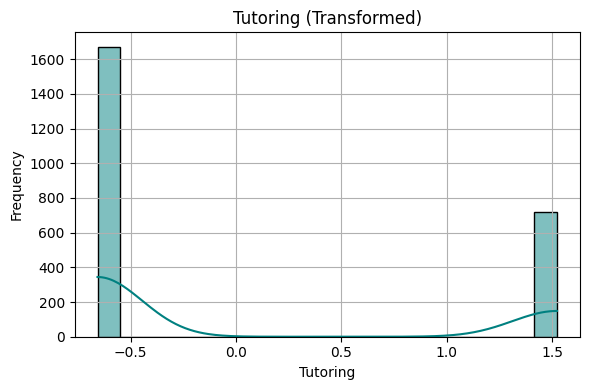

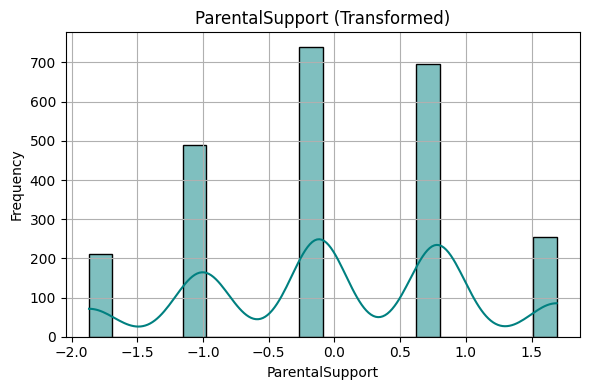

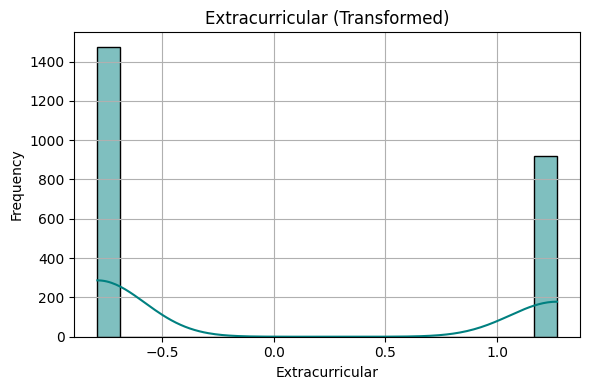

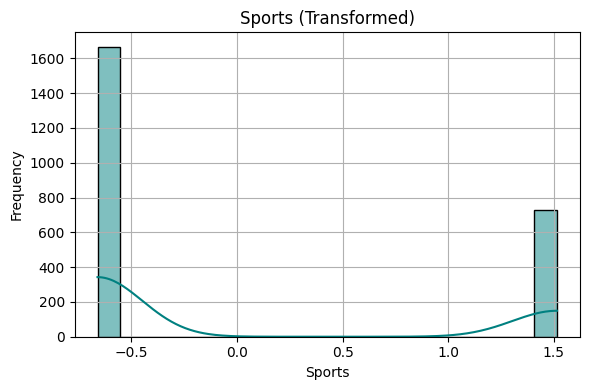

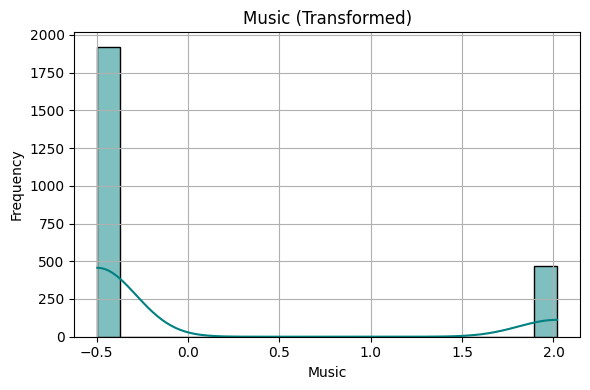

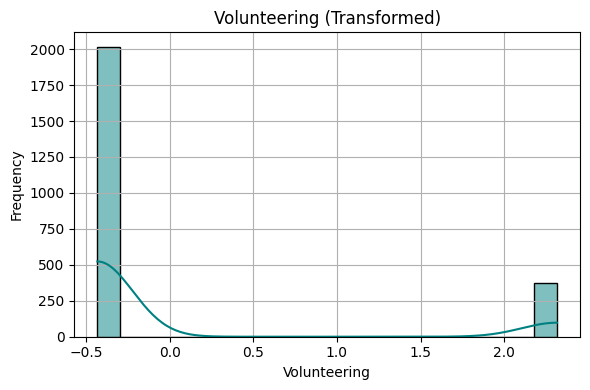

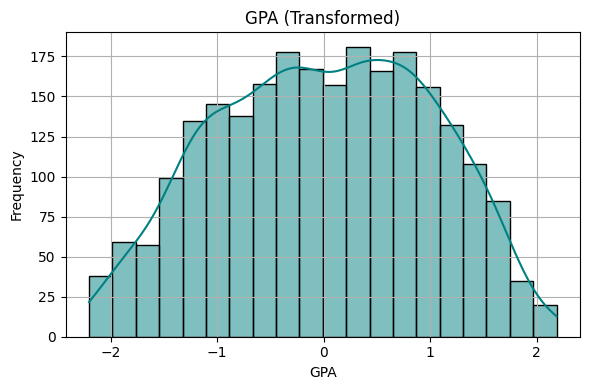

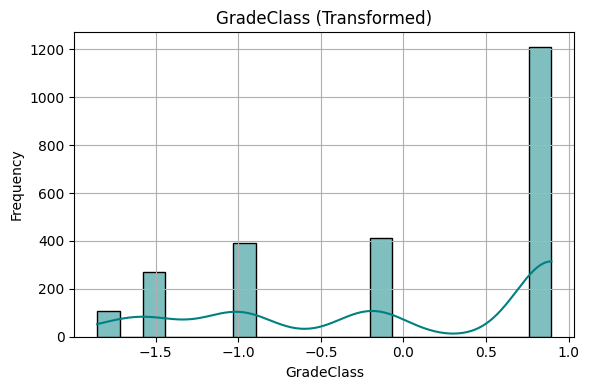

In [29]:
# Plot each column individually
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, bins=20, color='teal')
    plt.title(f"{col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [30]:
X= df.drop(['GPA','StudentID'],axis=1)
y= df['GPA']

In [31]:
X

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.0


In [32]:
y

0       2.929196
1       3.042915
2       0.112602
3       2.054218
4       1.288061
          ...   
2387    3.455509
2388    3.279150
2389    1.142333
2390    1.803297
2391    2.140014
Name: GPA, Length: 2392, dtype: float64

In [33]:
#Feature Selection
from sklearn.feature_selection import SelectKBest,f_regression

In [34]:
skb= SelectKBest( score_func= f_regression, k='all')

In [35]:
X_new=skb.fit_transform(X,y)

In [36]:
selected_columns= X.columns[skb.get_support()]
selected_columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GradeClass'],
      dtype='object')

In [49]:
X_selected= X[selected_columns]
X_selected
X_selected.to_csv('Featured Data.csv',index= False)
feature_names = X_selected.columns.tolist()

In [50]:
#Scaling
from sklearn.preprocessing import StandardScaler

In [51]:
ss= StandardScaler()
X_scaled= ss.fit_transform(X_selected)
X_scaled

array([[ 0.47291901,  0.97849211, -0.85339088, ...,  2.01954358,
        -0.43186565, -0.79738659],
       [ 1.36294441, -1.02198065, -0.85339088, ..., -0.49516139,
        -0.43186565, -1.60798953],
       [-1.30713178, -1.02198065,  1.09164102, ..., -0.49516139,
        -0.43186565,  0.82381929],
       ...,
       [-0.41710638,  0.97849211, -0.85339088, ..., -0.49516139,
         2.31553495, -0.79738659],
       [-0.41710638,  0.97849211,  0.11912507, ...,  2.01954358,
        -0.43186565, -1.60798953],
       [-0.41710638,  0.97849211, -0.85339088, ..., -0.49516139,
         2.31553495, -1.60798953]], shape=(2392, 13))

In [52]:
#Training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [53]:
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)
print('Y_train Shape:',y_train.shape)
print('Y_test Shape:',y_test.shape)

X_train Shape: (1913, 13)
X_test Shape: (479, 13)
Y_train Shape: (1913,)
Y_test Shape: (479,)


In [54]:
y.value_counts() 

GPA
0.000000    16
4.000000     7
2.928219     1
1.164539     1
2.054218     1
            ..
2.396788     1
1.341521     1
2.232175     1
1.384404     1
0.469553     1
Name: count, Length: 2371, dtype: int64

## Model Building

In [55]:
# Define regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Train & evaluate all models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="R2 Score", ascending=False, inplace=True)

# Display results
results_df

,Model,R2 Score,MAE,RMSE
3,Gradient Boosting,0.957554,0.146236,0.193495
0,Linear Regression,0.955660,0.162955,0.197765
2,Random Forest,0.946015,0.163253,0.218218
4,Support Vector Regressor,0.944615,0.169394,0.221029
1,Decision Tree,0.891990,0.235749,0.308663


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
# Hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Model
gb_model = GradientBoostingRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_gb = grid_search.best_estimator_

# Predictions
y_pred = best_gb.predict(X_test)

# Final scores
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Best Gradient Boosting Parameters:", grid_search.best_params_)
print("🎯 Best Model R2 Score:", r2)
print("📉 MAE:", mae)
print("📉 RMSE:", rmse)

✅ Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
🎯 Best Model R2 Score: 0.9594851431128129
📉 MAE: 0.14568708384760137
📉 RMSE: 0.18904264927610576


In [57]:
# Pipeline with scaler + Gradient Boosting
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingRegressor(random_state=42))
])

# Hyperparameter grid (for 'gb' step in pipeline)
param_grid = {
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__max_depth': [3, 4, 5],
    'gb__subsample': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit
grid_search.fit(X_train, y_train)

# Best pipeline model
best_pipeline = grid_search.best_estimator_

# Predictions
y_pred = best_pipeline.predict(X_test)

# Final scores
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Best Parameters:", grid_search.best_params_)
print("🎯 Best Model R2 Score:", r2)
print("📉 MAE:", mae)
print("📉 RMSE:", rmse)


✅ Best Parameters: {'gb__learning_rate': 0.05, 'gb__max_depth': 3, 'gb__n_estimators': 300, 'gb__subsample': 0.8}
🎯 Best Model R2 Score: 0.9594928142784122
📉 MAE: 0.14567356718612678
📉 RMSE: 0.18902475156856427


In [58]:
joblib.dump(pipeline,'Students_performance.joblib')

['Students_performance.joblib']

In [59]:
loaded_pipeline=joblib.load('Students_performance.joblib')

In [60]:
# ✅ Get feature names directly from DataFrame
new_data = pd.DataFrame(columns=feature_names)

# Fill values
new_data.loc[0, 'Age'] = 17
new_data.loc[0, 'Gender'] = 1
new_data.loc[0, 'Ethnicity'] = 0
new_data.loc[0, 'ParentalEducation'] = 2
new_data.loc[0, 'StudyTimeWeekly'] = 15.0
new_data.loc[0, 'Absences'] = 5
new_data.loc[0, 'Tutoring'] = 1
new_data.loc[0, 'ParentalSupport'] = 3
new_data.loc[0, 'Extracurricular'] = 1
new_data.loc[0, 'Sports'] = 0
new_data.loc[0, 'Music'] = 0
new_data.loc[0, 'Volunteering'] = 1
new_data.loc[0, 'GradeClass'] = 2

# Match feature order
new_data = new_data.reindex(columns=feature_names, fill_value=0)

# Predict with best pipeline
unseen_pred = best_pipeline.predict(new_data)
print("🔮 Predicted Target for Unseen Student:", unseen_pred[0])


🔮 Predicted Target for Unseen Student: 1.3482732865557838


C:\Users\vigne\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
